In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("hf://datasets/mud2002/IT_Students_Pakistan_performance_prediction/latest_cgpa.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
df.head(10)

gender it_program current_res fam_size guardian  health_stat  travel_time  \
0    Male         CS        Home      GT3   Father            3            3   
1    Male         CS        Home      GT3   Father            4            1   
2    Male         DS        Home      GT3   Father            4            1   
3  Female         CS        Home      GT3   Father            4            1   
4    Male         CS        Home      GT3   Father            5            4   
5    Male         CS        Home      GT3   Father            5            3   
6    Male         CS        Home      GT3   Father            4            1   
7    Male         CS        Home      GT3   Father            4            3   
8    Male         CS        Home      GT3   Father            5            1   
9    Male         CS        Home      GT3   Father            5            3   

   study_time  mot_edu  fat_edu  ...  matric_or_o fsc_or_a sem_1_sgpa  \
0           1        3        3  ...         83.0     65.0       2.91   
1           2        4        4  ...         88.0     64.0       2.77   
2           2        4        4  ...         92.0     78.0       3.14   
3           3        4        4  ...         90.0     90.0       4.00   
4           2        3        3  ...         50.0     60.0       3.33   
5           2        4        4  ...         88.0     82.0       2.35   
6           4        4        4  ...         91.0     79.0       3.39   
7           4        3        4  ...         80.0     75.0       3.76   
8           3        4        4  ...         70.0     60.0       3.07   
9           2        4        4  ...         95.0     90.0       3.75   

  sem_2_sgpa sem_3_sgpa  sem_4_sgpa  sem_5_sgpa sem_6_sgpa sem_7_sgpa  \
0       3.18       1.24        1.81        1.34       2.16       2.08   
1       3.34       2.62        2.50        3.06       2.80       3.33   
2       2.41       1.51        2.37        2.59        NaN        NaN   
3       3.33       3.67        3.71        3.50       3.67       3.43   
4       3.00       2.80        3.00        2.40       2.40       2.18   
5       2.92       3.01        2.73        2.56       2.47       1.55   
6       3.60       3.13        3.50        3.40       3.55       3.50   
7       3.85       3.77        3.78        3.78       3.80       3.87   
8       3.04       2.20        2.40        2.45       2.40       2.50   
9       3.51       3.96        3.24        3.25       3.73       3.41   

  sem_8_sgpa  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
6        NaN  
7        NaN  
8        NaN  
9        NaN  

[10 rows x 34 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              143 non-null    object 
 1   it_program          143 non-null    object 
 2   current_res         143 non-null    object 
 3   fam_size            143 non-null    object 
 4   guardian            143 non-null    object 
 5   health_stat         143 non-null    int64  
 6   travel_time         143 non-null    int64  
 7   study_time          143 non-null    int64  
 8   mot_edu             143 non-null    int64  
 9   fat_edu             143 non-null    int64  
 10  fam_rel_qual        143 non-null    int64  
 11  parents_cohab_stat  143 non-null    object 
 12  add_type            143 non-null    object 
 13  current_stat        143 non-null    object 
 14  extra_curricular    143 non-null    object 
 15  hang_out_friends    143 non-null    int64  
 16  current_

In [7]:
df.describe()

health_stat  travel_time  study_time     mot_edu     fat_edu  \
count   143.000000   143.000000  143.000000  143.000000  143.000000   
mean      4.258741     2.377622    2.286713    3.069930    3.293706   
std       0.962050     0.970002    0.860907    1.214063    1.105888   
min       1.000000     1.000000    1.000000    0.000000    0.000000   
25%       4.000000     2.000000    2.000000    3.000000    3.000000   
50%       5.000000     2.000000    2.000000    3.000000    4.000000   
75%       5.000000     3.000000    3.000000    4.000000    4.000000   
max       5.000000     4.000000    4.000000    4.000000    4.000000   

       fam_rel_qual  hang_out_friends  current_cgpa  matric_or_o    fsc_or_a  \
count    143.000000        143.000000    143.000000   143.000000  143.000000   
mean       4.447552          3.293706      3.112594    81.209930   73.836713   
std        0.976328          1.260629      0.462719     9.537557    9.769906   
min        1.000000          1.000000      2.100000    44.000000   52.000000   
25%        4.000000          2.000000      2.795000    76.000000   67.000000   
50%        5.000000          3.000000      3.150000    82.000000   75.000000   
75%        5.000000          4.000000      3.500000    88.000000   80.000000   
max        5.000000          5.000000      3.930000   100.000000  100.000000   

       sem_1_sgpa  sem_2_sgpa  sem_3_sgpa  sem_4_sgpa  sem_5_sgpa  sem_6_sgpa  \
count  143.000000  143.000000  137.000000  136.000000  130.000000  113.000000   
mean     3.130259    3.128531    3.032168    3.102985    3.069862    3.131327   
std      0.444235    0.483221    0.586066    0.552035    0.582716    0.579968   
min      1.680000    1.500000    1.240000    1.810000    1.340000    0.360000   
25%      2.800000    2.900000    2.800000    2.715000    2.600000    2.800000   
50%      3.100000    3.180000    3.100000    3.130000    3.200000    3.250000   
75%      3.500000    3.500000    3.460000    3.500000    3.500000    3.570000   
max      4.000000    4.680000    4.000000    4.000000    4.000000    4.000000   

       sem_7_sgpa  sem_8_sgpa  
count   83.000000   42.000000  
mean     3.136627    3.233595  
std      0.591949    0.556535  
min      1.550000    1.700000  
25%      2.790000    2.925000  
50%      3.260000    3.300000  
75%      3.585000    3.700000  
max      4.000000    4.000000

In [8]:
df.isnull().sum()

gender                  0
it_program              0
current_res             0
fam_size                0
guardian                0
health_stat             0
travel_time             0
study_time              0
mot_edu                 0
fat_edu                 0
fam_rel_qual            0
parents_cohab_stat      0
add_type                0
current_stat            0
extra_curricular        0
hang_out_friends        0
current_cgpa            0
prev_edu                0
current_sem             0
calc                    1
pf                      1
oop                     4
dsa                     4
os                      4
matric_or_o             0
fsc_or_a                0
sem_1_sgpa              0
sem_2_sgpa              0
sem_3_sgpa              6
sem_4_sgpa              7
sem_5_sgpa             13
sem_6_sgpa             30
sem_7_sgpa             60
sem_8_sgpa            101
dtype: int64

In [13]:
#df= df.drop(['guardian', 'fam_size',], axis=1)


KeyError: "['guardian', 'fam_size'] not found in axis"

In [11]:
df.head(10)

gender it_program current_res  health_stat  travel_time  study_time  \
0    Male         CS        Home            3            3           1   
1    Male         CS        Home            4            1           2   
2    Male         DS        Home            4            1           2   
3  Female         CS        Home            4            1           3   
4    Male         CS        Home            5            4           2   
5    Male         CS        Home            5            3           2   
6    Male         CS        Home            4            1           4   
7    Male         CS        Home            4            3           4   
8    Male         CS        Home            5            1           3   
9    Male         CS        Home            5            3           2   

   mot_edu  fat_edu  fam_rel_qual parents_cohab_stat  ... matric_or_o  \
0        3        3             4           Together  ...        83.0   
1        4        4             5             Abroad  ...        88.0   
2        4        4             4           Together  ...        92.0   
3        4        4             4           Together  ...        90.0   
4        3        3             3           Together  ...        50.0   
5        4        4             5           Together  ...        88.0   
6        4        4             4           Together  ...        91.0   
7        3        4             4           Together  ...        80.0   
8        4        4             5             Abroad  ...        70.0   
9        4        4             5           Together  ...        95.0   

  fsc_or_a sem_1_sgpa  sem_2_sgpa  sem_3_sgpa sem_4_sgpa sem_5_sgpa  \
0     65.0       2.91        3.18        1.24       1.81       1.34   
1     64.0       2.77        3.34        2.62       2.50       3.06   
2     78.0       3.14        2.41        1.51       2.37       2.59   
3     90.0       4.00        3.33        3.67       3.71       3.50   
4     60.0       3.33        3.00        2.80       3.00       2.40   
5     82.0       2.35        2.92        3.01       2.73       2.56   
6     79.0       3.39        3.60        3.13       3.50       3.40   
7     75.0       3.76        3.85        3.77       3.78       3.78   
8     60.0       3.07        3.04        2.20       2.40       2.45   
9     90.0       3.75        3.51        3.96       3.24       3.25   

  sem_6_sgpa sem_7_sgpa sem_8_sgpa  
0       2.16       2.08        NaN  
1       2.80       3.33        NaN  
2        NaN        NaN        NaN  
3       3.67       3.43        NaN  
4       2.40       2.18        NaN  
5       2.47       1.55        NaN  
6       3.55       3.50        NaN  
7       3.80       3.87        NaN  
8       2.40       2.50        NaN  
9       3.73       3.41        NaN  

[10 rows x 32 columns]

In [16]:
mmean=np.mean(df['current_cgpa'])
print(mmean)

3.112594405594406


In [18]:
median=np.median(df['current_cgpa'])
print(median  )

3.15


<ipython-input-22-54e235ed6b52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='it_program', y='sem_1_sgpa', palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

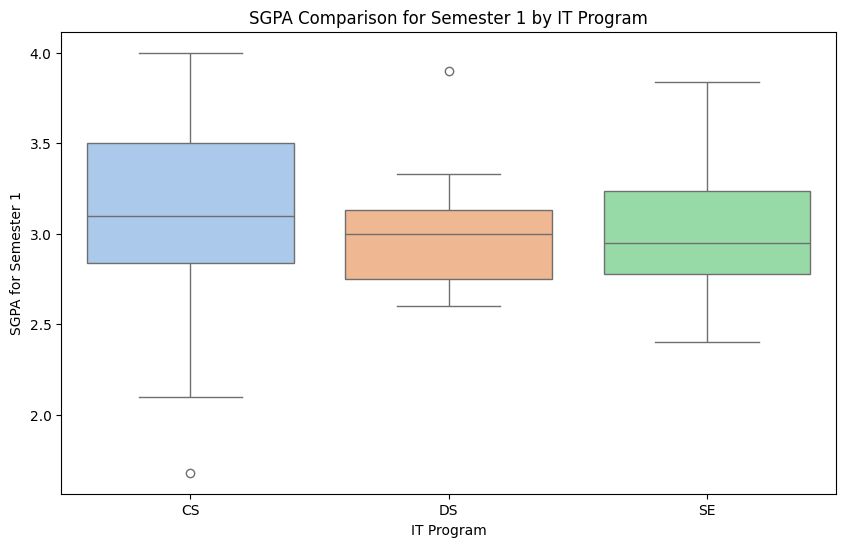

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='it_program', y='sem_1_sgpa', palette='pastel')
plt.title('SGPA Comparison for Semester 1 by IT Program')
plt.xlabel('IT Program')
plt.ylabel('SGPA for Semester 1')
plt.show()

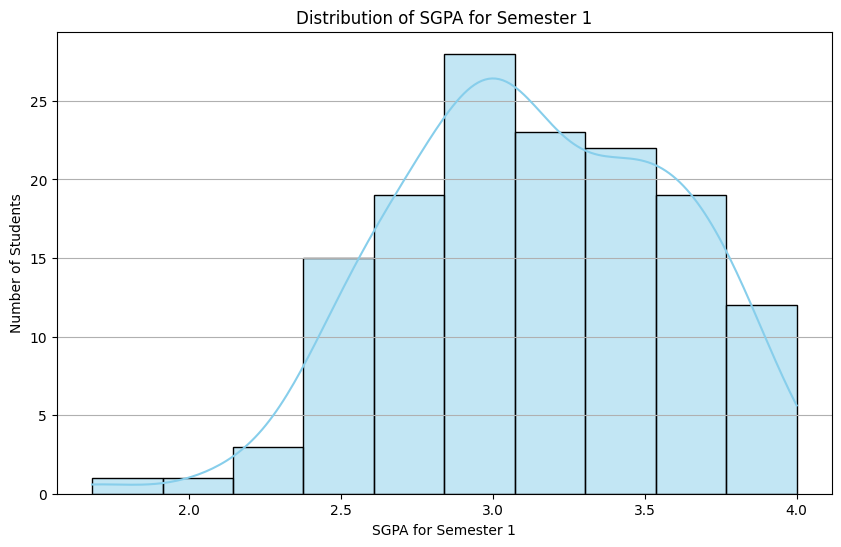

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sem_1_sgpa'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of SGPA for Semester 1')
plt.xlabel('SGPA for Semester 1')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()